# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('price.csv')

In [3]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
data.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [9]:
cols_num = [
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
    "enginesize",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "peakrpm",
    "citympg",
    "highwaympg"
]

cols_cat = [
    "symboling",
    "fueltype",
    "aspiration",
    "doornumber",
    "carbody",
    "drivewheel",
    "enginelocation",
    "enginetype",
    "cylindernumber",
    "fuelsystem"
]

In [10]:
data["wheelbase"].isnull().any()

False

In [11]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

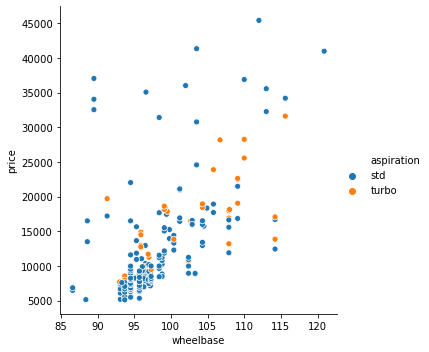

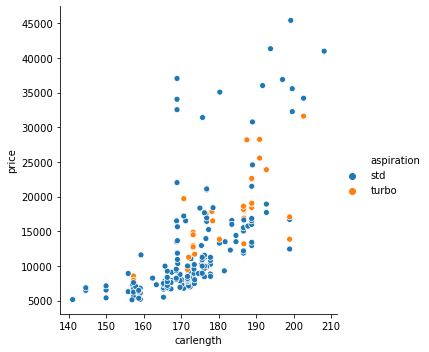

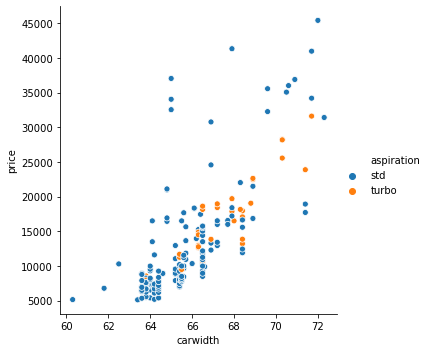

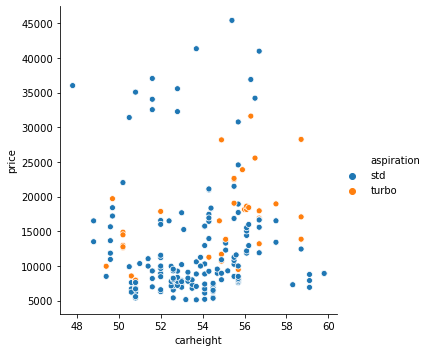

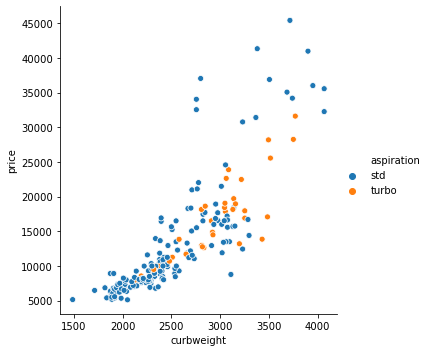

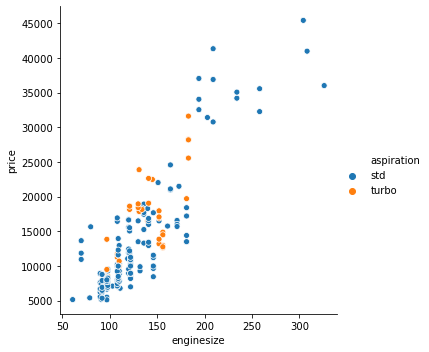

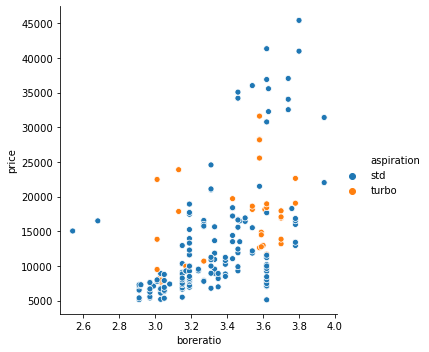

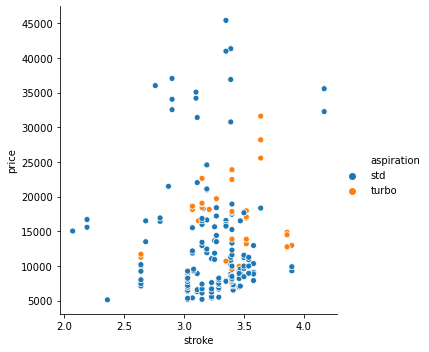

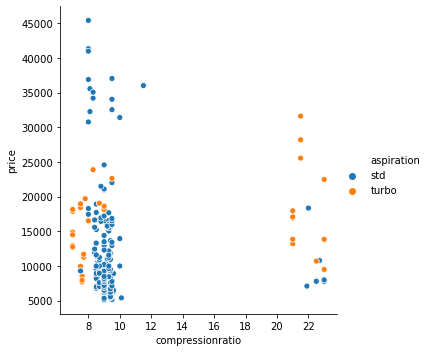

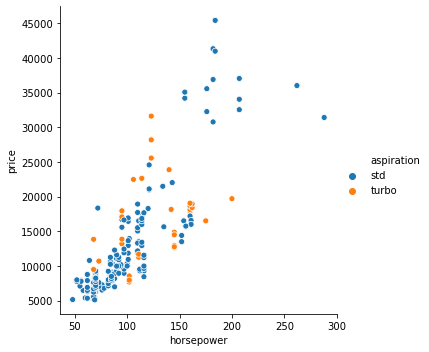

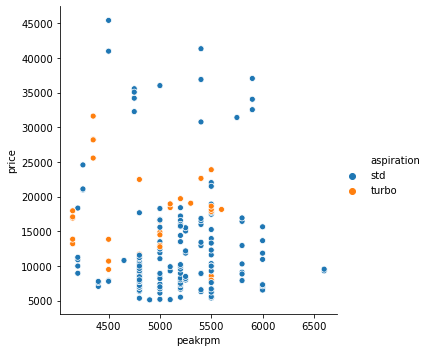

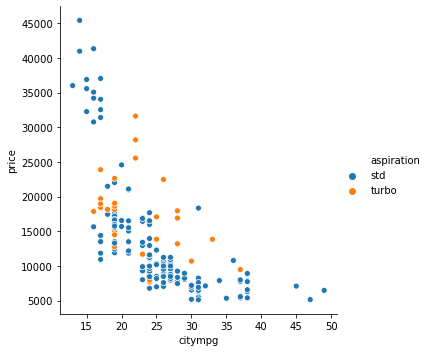

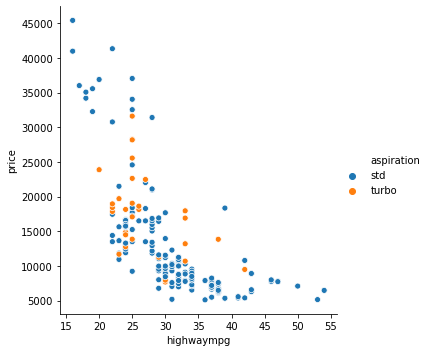

In [12]:
for col in cols_num:
    sns.relplot(x = col, y = "price", hue = "aspiration", data = data)
    plt.show()

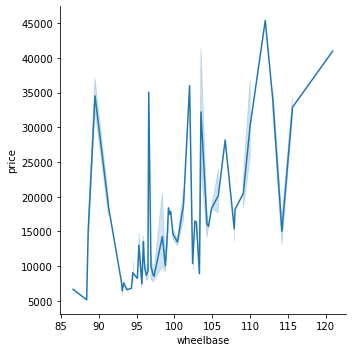

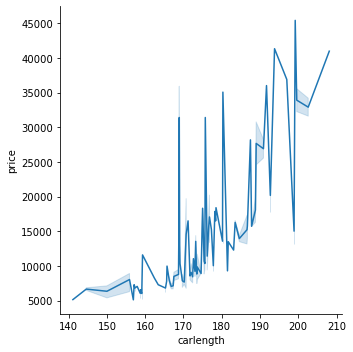

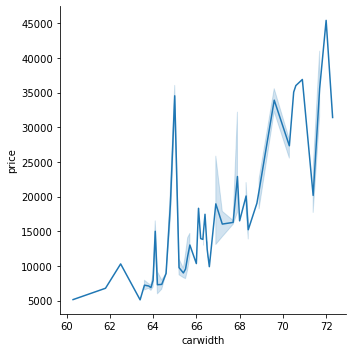

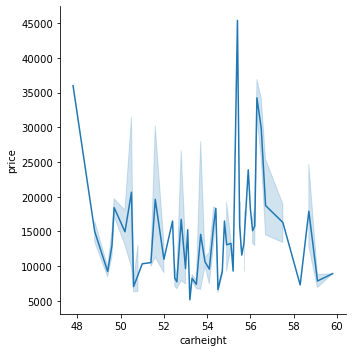

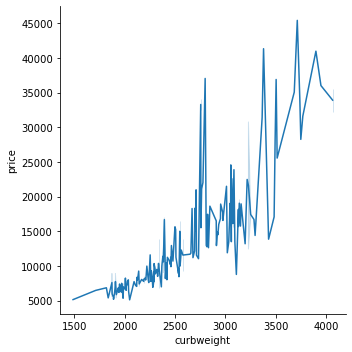

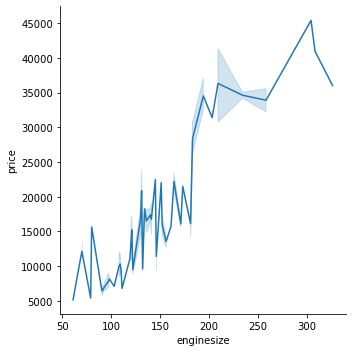

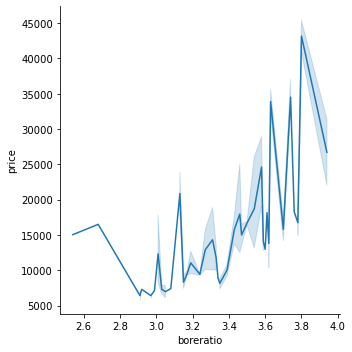

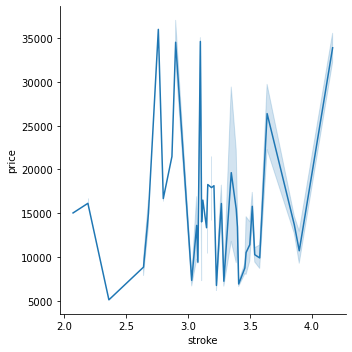

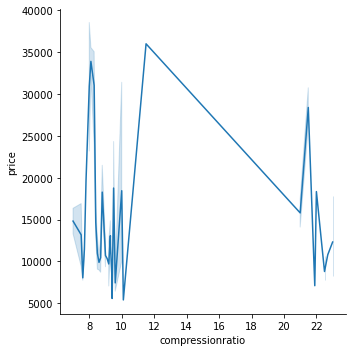

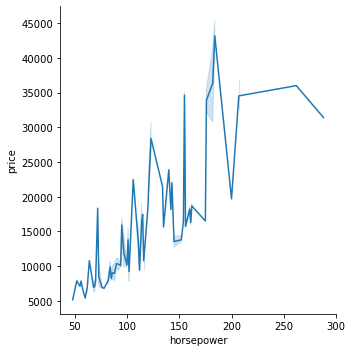

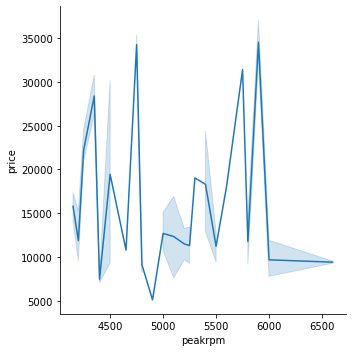

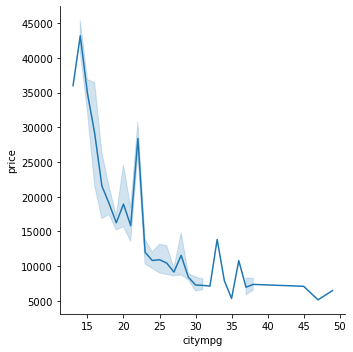

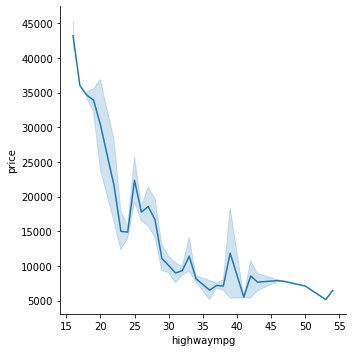

In [13]:
for col in cols_num:
    sns.relplot(x = col, y = "price", kind = "line", data = data)
    plt.show()

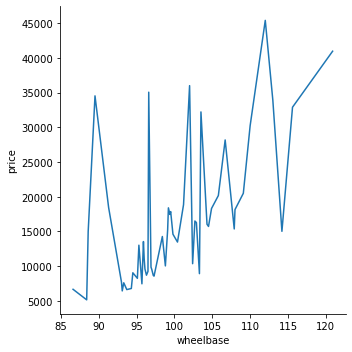

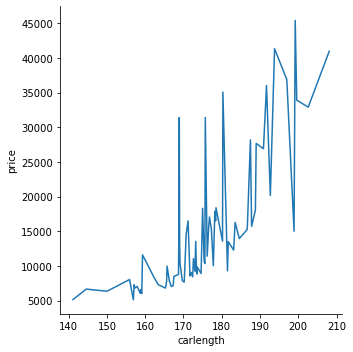

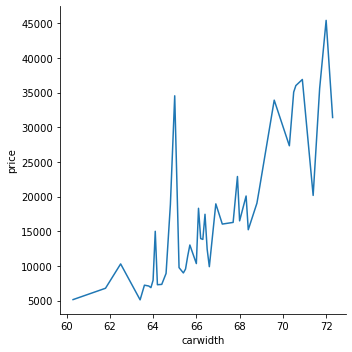

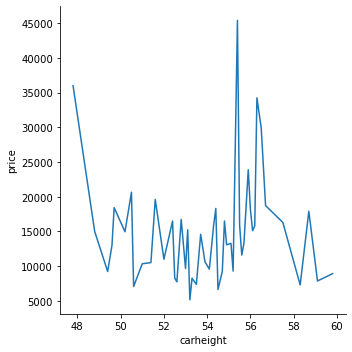

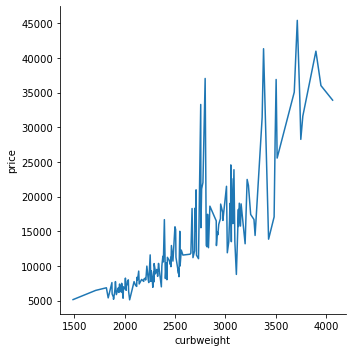

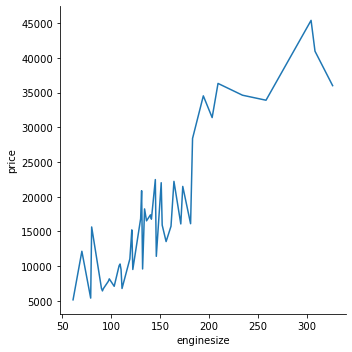

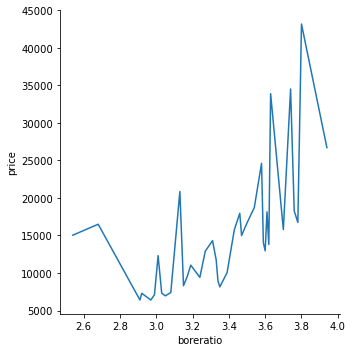

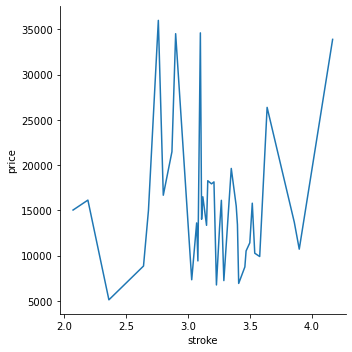

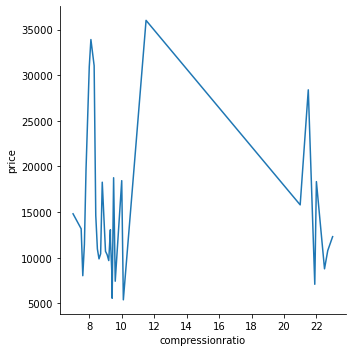

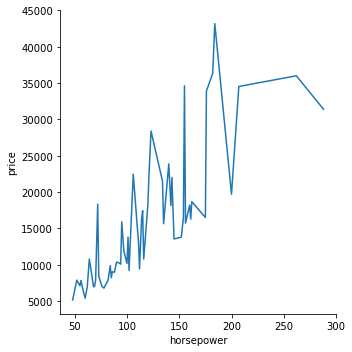

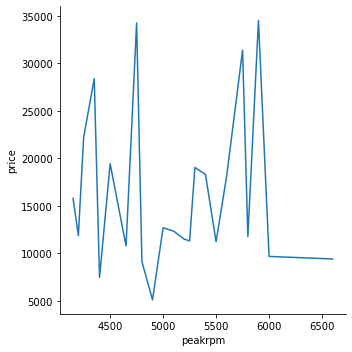

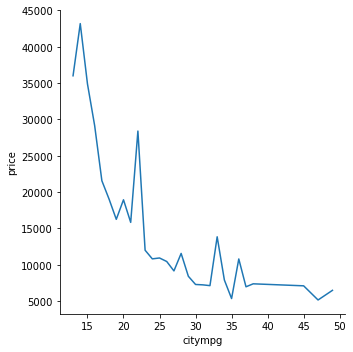

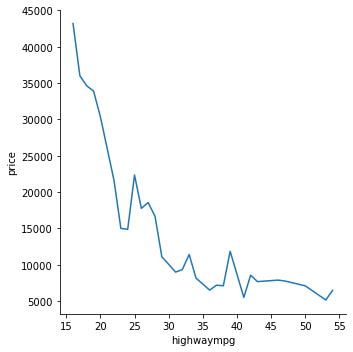

In [14]:
for col in cols_num:
    sns.relplot(x = col, y = "price", kind = "line", data = data, ci = None)
    plt.show()

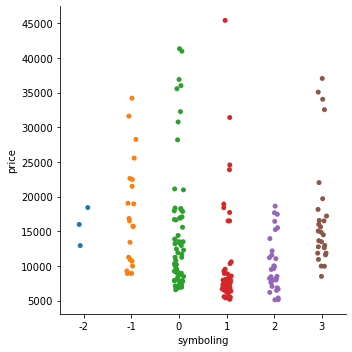

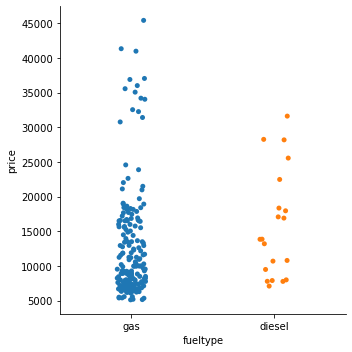

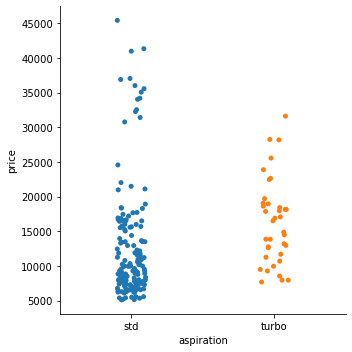

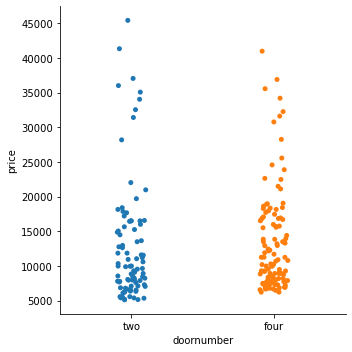

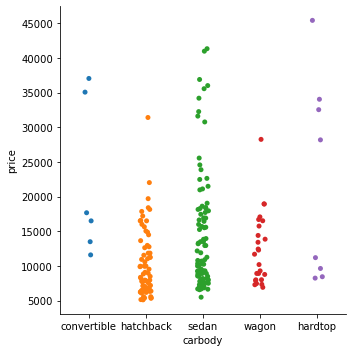

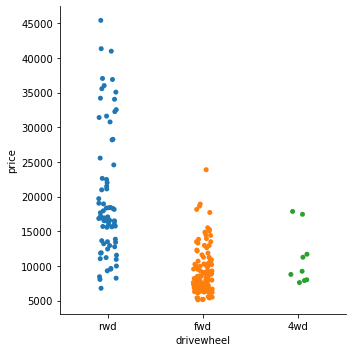

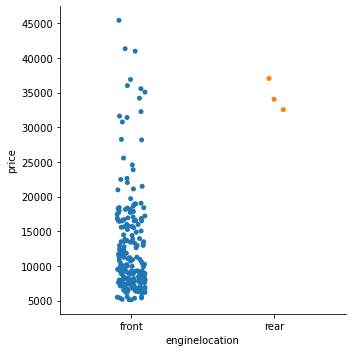

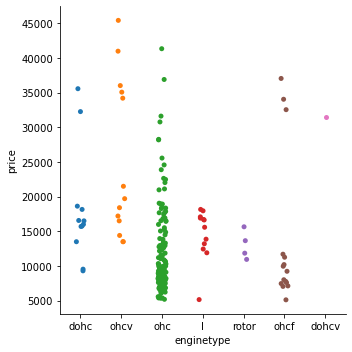

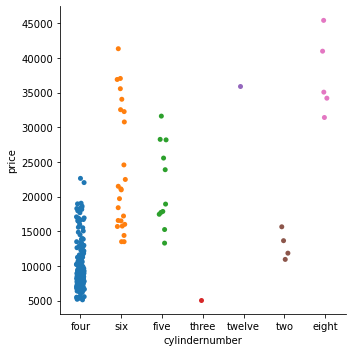

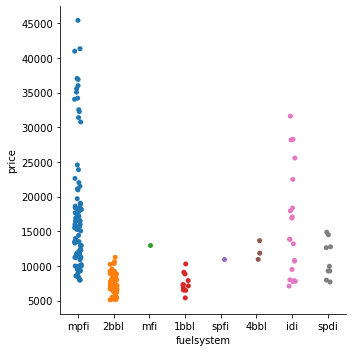

In [15]:
for col in cols_cat:
    sns.catplot(x = col, y = "price", data = data)

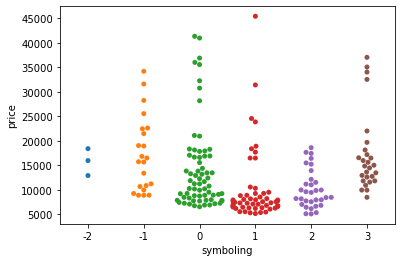

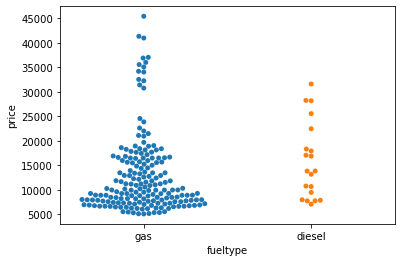

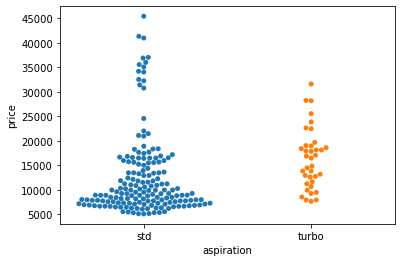

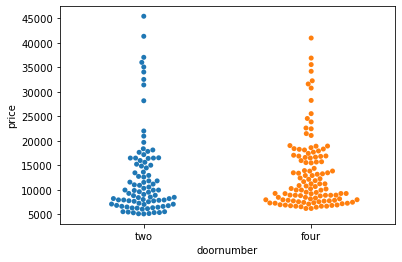

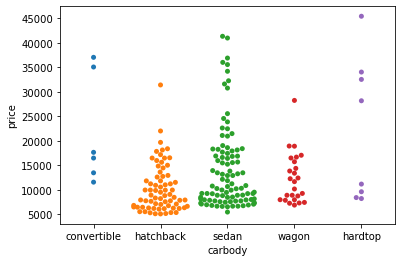

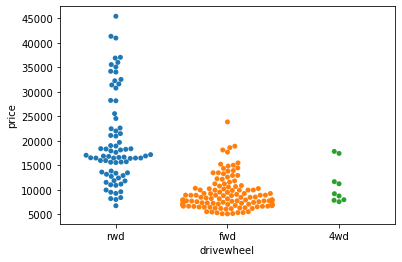

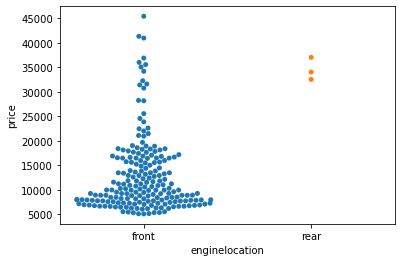

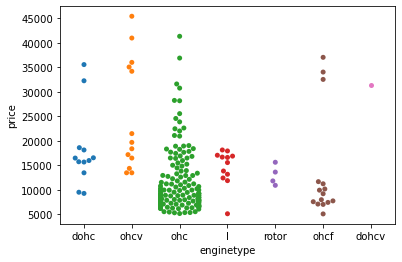

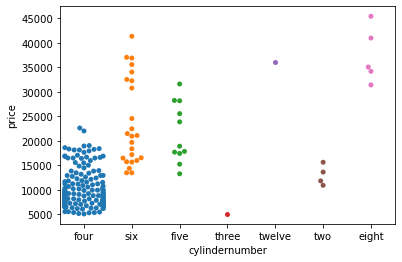

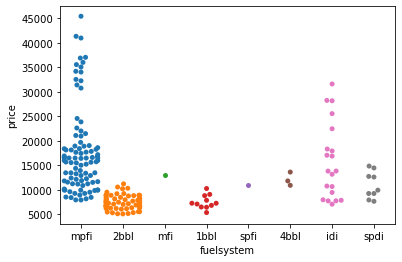

In [16]:
for col in cols_cat:
    sns.swarmplot(x = col, y = "price", data = data)
    plt.show()

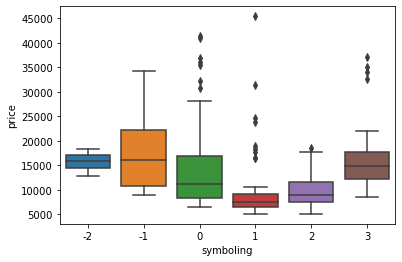

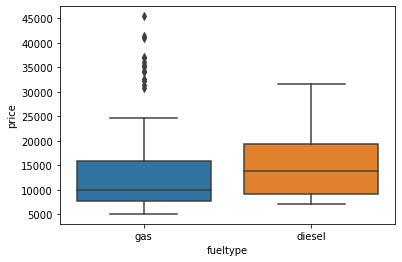

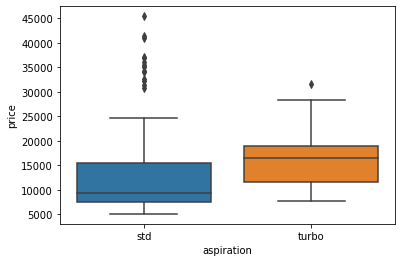

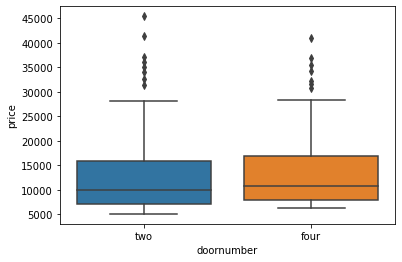

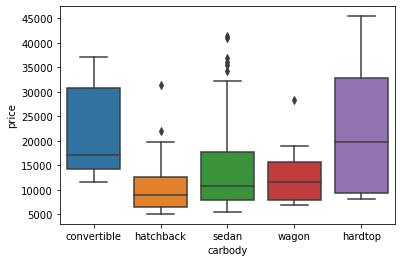

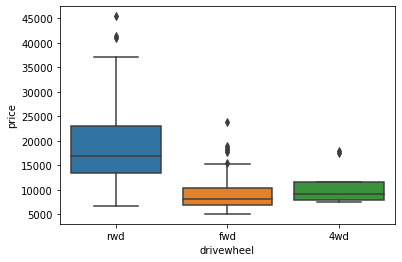

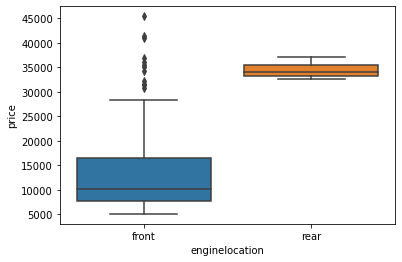

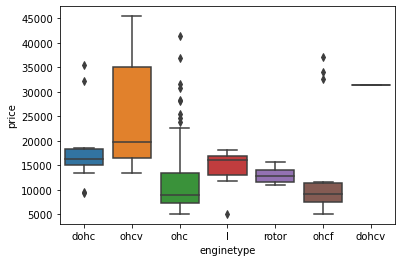

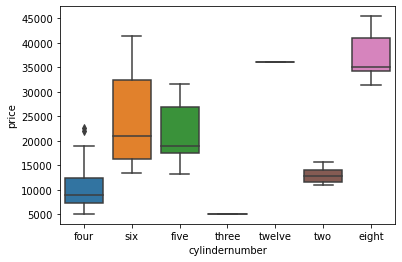

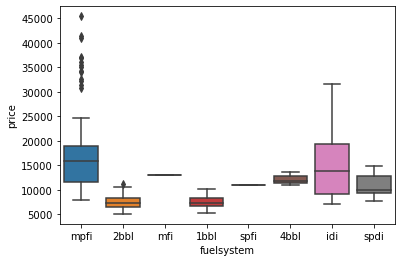

In [17]:
for col in cols_cat:
    sns.boxplot(x = col, y = "price", data = data)
    plt.show()

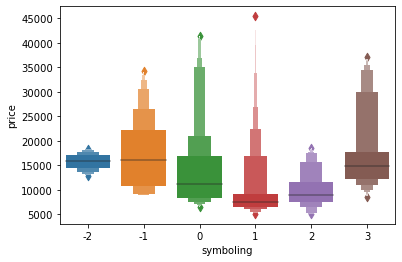

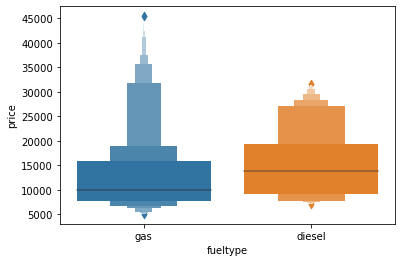

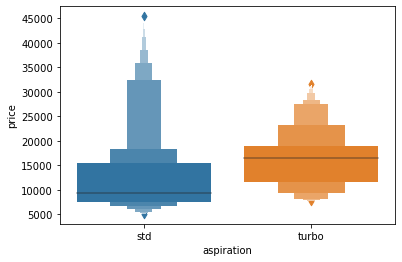

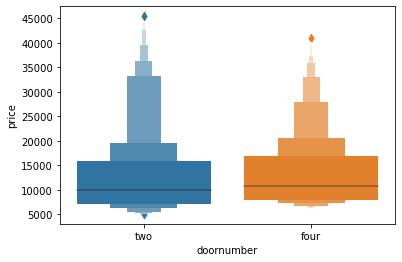

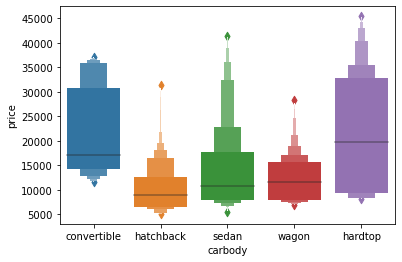

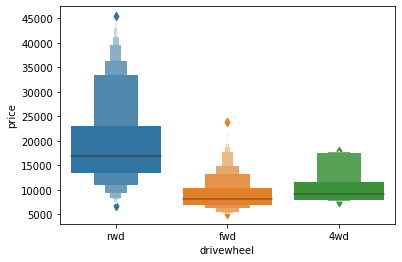

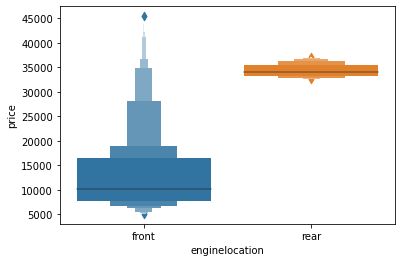

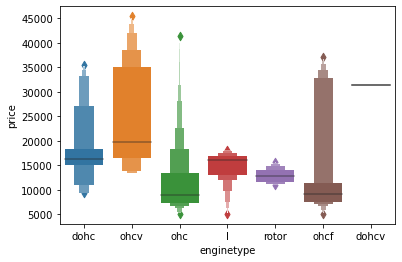

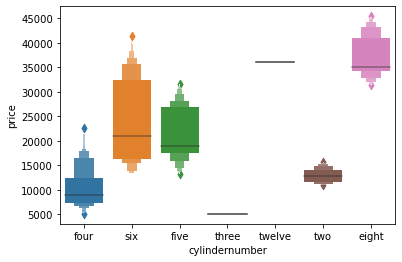

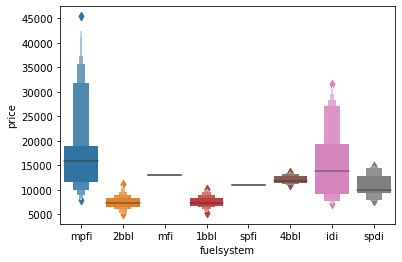

In [18]:
for col in cols_cat:
    sns.boxenplot(x = col, y = "price", data = data)
    plt.show()

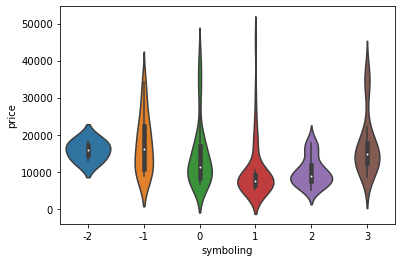

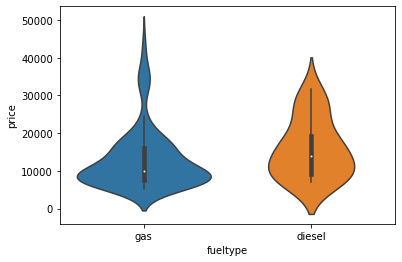

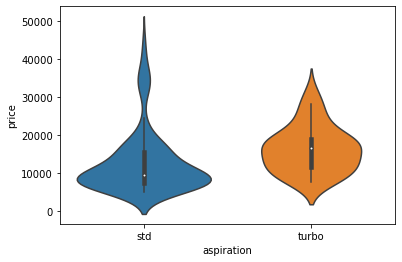

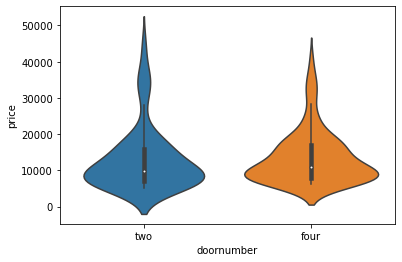

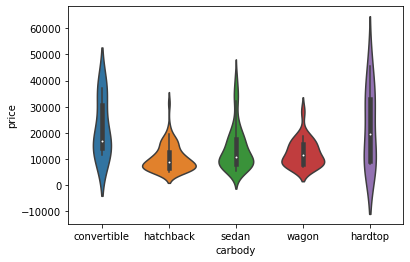

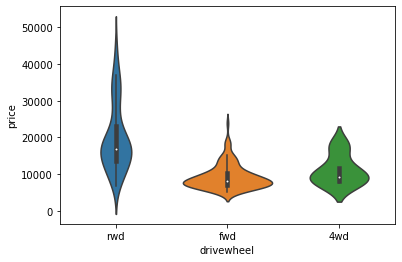

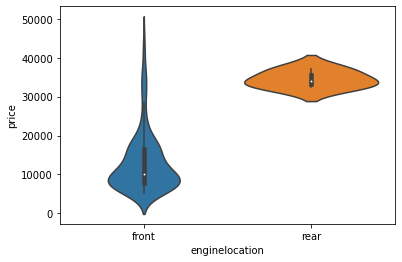

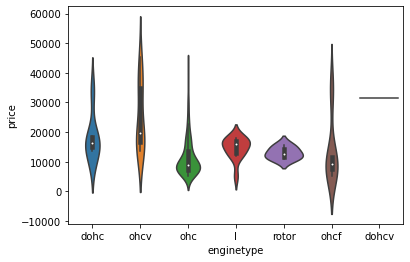

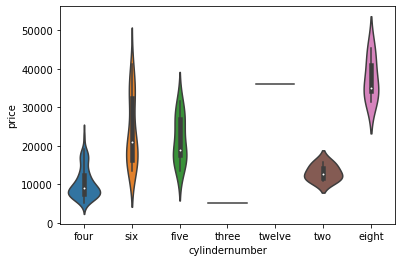

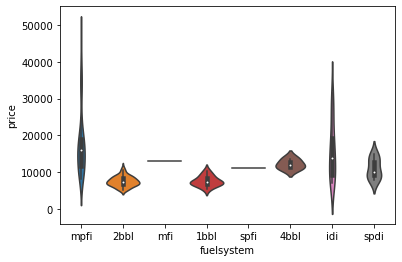

In [19]:
for col in cols_cat:
    sns.violinplot(x = col, y = "price", data = data)
    plt.show()

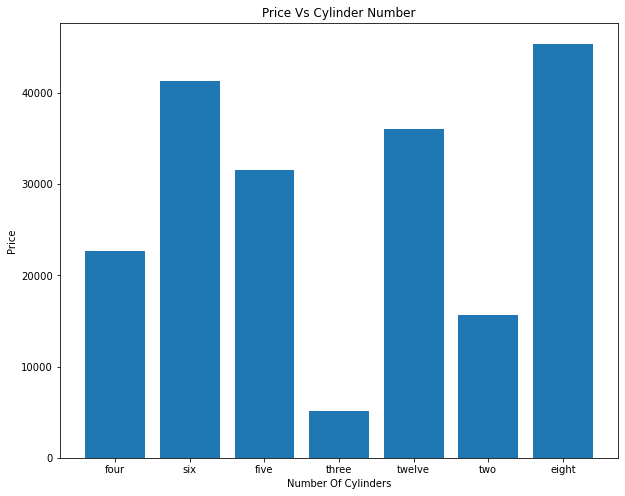

In [20]:
plt.figure(figsize = (10, 8))
plt.bar(data["cylindernumber"], data["price"])
plt.title("Price Vs Cylinder Number")
plt.xlabel("Number Of Cylinders")
plt.ylabel("Price")
plt.show()

In [21]:
data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

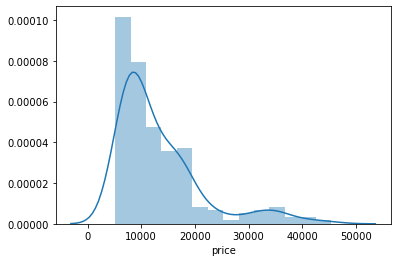

In [22]:
sns.distplot(data["price"])
plt.show()

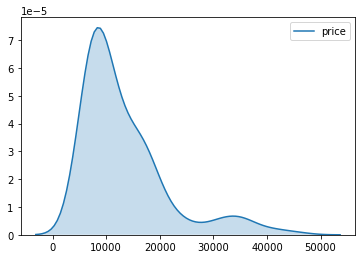

In [23]:
sns.kdeplot(data["price"], shade = True)
plt.show()

In [24]:
data.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
df = data.copy()

In [26]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
le = LabelEncoder()

In [28]:
def convert_word_to_num(a):
    if a == "zero":
        return 0
    elif a == "one":
        return 1
    elif a == "two":
        return 2
    elif a == "three":
        return 3
    elif a == "four":
        return 4
    elif a == "five":
        return 5
    elif a == "six":
        return 6
    elif a == "seven":
        return 7
    elif a == "eight":
        return 8
    elif a == "nine":
        return 9
    elif a == "ten":
        return 10
    elif a == "eleven":
        return 11
    elif a == "twelve":
        return 12

In [29]:
df['doornumber'] = df['doornumber'].apply(convert_word_to_num)
df['cylindernumber'] = df['cylindernumber'].apply(convert_word_to_num)

In [30]:
df.drop(['make'], axis = 1, inplace = True)

In [31]:
df['fueltype'] = le.fit_transform(df['fueltype'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])

In [32]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,2,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,2,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,4,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,4,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
df['fueltype'].unique()

array([1, 0])

In [34]:
df['aspiration'].unique()

array([0, 1])

In [35]:
df['doornumber'].unique()

array([2, 4], dtype=int64)

In [36]:
df['carbody'].unique()

array([0, 2, 3, 4, 1])

In [37]:
df['drivewheel'].unique()

array([2, 1, 0])

In [38]:
df['enginelocation'].unique()

array([0, 1])

In [39]:
df['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [40]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [41]:
df['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [42]:
scaler = StandardScaler()

In [43]:
cols_num = [
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
    "enginesize",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "peakrpm",
    "citympg",
    "highwaympg"
]

In [44]:
for col in cols_num:
    df[col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))

In [45]:
df['wheelbase']

0     -1.690772
1     -1.690772
2     -0.708596
3      0.173698
4      0.107110
         ...   
200    1.721873
201    1.721873
202    1.721873
203    1.721873
204    1.721873
Name: wheelbase, Length: 205, dtype: float64

In [46]:
df['wheelbase'].mean(), df['wheelbase'].std()

(-1.2911081418079869e-15, 1.0024479840791312)

In [47]:
for col in cols_num:
    print("Mean - ", df[col].mean(), "Std - ", df[col].std())

Mean -  -1.2911081418079869e-15 Std -  1.0024479840791312
Mean -  3.656695542570272e-15 Std -  1.002447984079131
Mean -  1.089643280754056e-15 Std -  1.0024479840791312
Mean -  -5.372396294771489e-16 Std -  1.0024479840791312
Mean -  1.1264701908391832e-16 Std -  1.0024479840791312
Mean -  3.466062125659025e-17 Std -  1.0024479840791312
Mean -  2.2529403816783665e-15 Std -  1.002447984079131
Mean -  2.06230696476712e-15 Std -  1.0024479840791312
Mean -  -3.6393652319419763e-16 Std -  1.0024479840791312
Mean -  1.8196826159709882e-16 Std -  1.0024479840791312
Mean -  2.77284970052722e-16 Std -  1.002447984079131
Mean -  1.1048073025538143e-16 Std -  1.002447984079131
Mean -  1.4730764034050858e-16 Std -  1.002447984079131


In [48]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,13495.0
1,3,1,0,2,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,16500.0
2,1,1,0,2,2,2,0,-0.708596,-0.231513,-0.190566,...,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,16500.0
3,2,1,0,4,3,1,0,0.173698,0.207256,0.136542,...,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,13950.0
4,2,1,0,4,3,0,0,0.107110,0.207256,0.230001,...,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,17450.0


In [49]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,2,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,13495.0
1,3,1,0,2,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,16500.0
2,1,1,0,2,2,2,0,-0.708596,-0.231513,-0.190566,...,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,16500.0
3,2,1,0,4,3,1,0,0.173698,0.207256,0.136542,...,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,13950.0
4,2,1,0,4,3,0,0,0.107110,0.207256,0.230001,...,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,17450.0


# Training and Testing data

In [50]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [51]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,2,0,2,0,-1.690772,-0.426521,-0.844782,...,4,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,3,1,0,2,0,2,0,-1.690772,-0.426521,-0.844782,...,4,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,1,1,0,2,2,2,0,-0.708596,-0.231513,-0.190566,...,6,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,2,1,0,4,3,1,0,0.173698,0.207256,0.136542,...,4,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,2,1,0,4,3,0,0,0.107110,0.207256,0.230001,...,5,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900


In [52]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 23), (41, 23), (164,), (41,))

### Linear Regression

In [55]:
lin_reg = LinearRegression()

In [57]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [58]:
lin_y_pred = lin_reg.predict(X_test)

In [59]:
mse = mean_squared_error(y_test, lin_y_pred)

In [60]:
mse

17168050.335727684

In [61]:
rmse = np.sqrt(mse)

In [62]:
rmse

4143.434606184546

In [63]:
score = r2_score(y_test, lin_y_pred)

In [64]:
score

0.7782374328891261

In [65]:
to_predict = [[0, 1, 0, 4, 3, 2, 0, 3.00, 2.54, 1.32, 0.72, 0.99, 5, 12, 0.50, 5, 0.88, 0.48, 0.55, 2.00, 0.78, 1.00, 1.50]]

In [66]:
predicted = lin_reg.predict(to_predict)

In [67]:
predicted

array([15923.02301474])

In [68]:
cross_val_score(lin_reg, X, y, scoring = "neg_mean_squared_error")

array([-26676861.24193642, -24137902.72640252, -21714568.52705266,
       -28257828.53347388, -14242803.73877701])

In [69]:
cross_val_score(lin_reg, X, y, scoring = "r2")

array([ 0.63379161,  0.81329059, -0.16593298,  0.55724409,  0.20849154])

# Decision Tree Regressor

In [70]:
decision_tree_reg = DecisionTreeRegressor()

In [71]:
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
tree_y_pred = decision_tree_reg.predict(X_test)

In [73]:
mse = mean_squared_error(y_test, tree_y_pred)

In [74]:
mse

9272403.49390244

In [75]:
rmse = np.sqrt(mse)

In [76]:
rmse

3045.062149431837

In [77]:
score = r2_score(y_test, tree_y_pred)

In [78]:
score

0.8802268188941395

In [79]:
to_predict = [[0, 1, 0, 4, 3, 2, 0, 3.00, 2.54, 1.32, 0.72, 0.99, 5, 12, 0.50, 5, 0.88, 0.48, 0.55, 2.00, 0.78, 1.00, 1.50]]

In [80]:
predicted = decision_tree_reg.predict(to_predict)

In [81]:
predicted

array([19045.])

In [82]:
cross_val_score(decision_tree_reg, X, y, scoring = "neg_mean_squared_error")

array([-14267352.70985095, -15906940.31707317, -50495771.12804878,
       -10779422.71341463, -17547479.73170732])

In [83]:
cross_val_score(decision_tree_reg, X, y, scoring = "r2")

array([ 0.82962457,  0.88631488, -1.37074088,  0.62215336, -0.00376177])

### RandomForestRegressor

In [84]:
rfg = RandomForestRegressor()

In [85]:
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
rfg_y_pred = rfg.predict(X_test)

In [87]:
mse = mean_squared_error(y_test, rfg_y_pred)

In [88]:
mse

7298251.033757503

In [89]:
score = r2_score(y_test, rfg_y_pred)

In [90]:
score

0.9057272751992399

In [91]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
4,2,1,0,4,3,0,0,0.107110,0.207256,0.230001,...,5,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
71,-1,1,0,4,3,2,0,2.803932,2.319847,2.706677,...,8,2.578000,5,0.482059,-0.496800,-0.465012,1.289887,-0.788368,-1.412700,-1.856174
134,3,1,0,2,2,1,0,0.057168,1.019791,0.276731,...,4,-0.142204,5,-2.923049,-3.789311,-0.212636,0.149133,0.262448,-0.646553,-0.400490
145,0,1,1,4,3,0,0,-0.292420,-0.166510,-0.237296,...,4,-0.455148,5,1.074252,-1.967242,-0.616438,0.174483,-0.683286,-0.186865,-0.254922
122,1,1,0,4,3,1,0,-0.841772,-0.548402,-0.984972,...,4,-0.695874,1,-1.331531,-0.081241,-0.187398,-0.915571,0.787855,0.885740,1.055193


In [92]:
X_train.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [98]:
to_predict = [[0, 1, 0, 4, 3, 2, 0, 3.00, 2.54, 1.32, 0.72, 0.99, 5, 12, 0.50, 5, 0.88, 0.48, 0.55, 2.00, 0.78, 1.00, 1.50]]

In [99]:
predicted = rfg.predict(to_predict)

In [100]:
predicted

array([19094.38334])

In [101]:
cross_val_score(rfg, X, y, scoring = "neg_mean_squared_error")

array([-10751066.50331819, -13513769.43146629, -49011433.94530326,
        -6323646.59076816,  -5855832.50811009])

In [103]:
cross_val_score(rfg, X, y, scoring = "r2")

array([ 0.85579793,  0.90475261, -1.24043907,  0.90183467,  0.66856886])